In [1]:
import numpy as np                                          # type: ignore
import pandas as pd                                         # type: ignore
import matplotlib.pyplot as plt                             # type: ignore

from sklearn.model_selection import train_test_split        # type: ignore
from sklearn.linear_model import LinearRegression , Lasso   # type: ignore

In [2]:
from sklearn.datasets import load_breast_cancer             # type: ignore  

cancer = load_breast_cancer()
print (cancer.keys(),"\n========")
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df.head(3)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']) 


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [3]:
X = cancer.data
Y = cancer.target

# splitting:
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)

In [4]:
# apply linear regression:

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

print(f'Linear Regression Train Score : {lr_train_score}')
print(f'Linear Regression Test  Score : {lr_test_score}')

Linear Regression Train Score : 0.784220619405507
Linear Regression Test  Score : 0.7329325010888693


In [5]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score = lasso.score(X_train,y_train)
test_score  = lasso.score(X_test,y_test)

print(f'Lasso Regression Train Score : {train_score}')
print(f'Lasso Regression Test  Score : {test_score}')

coef_used = np.sum(lasso.coef_!=0)
print (f"number of features used: {coef_used}")

Lasso Regression Train Score : 0.5600974529893079
Lasso Regression Test  Score : 0.5832244618818156
number of features used: 4


In [6]:
lasso001 = Lasso(alpha=0.01, max_iter=1000000)
lasso001.fit(X_train,y_train)
train_score001 = lasso001.score(X_train,y_train)
test_score001  = lasso001.score(X_test,y_test)

print(f'train score for alpha=0.01 : {train_score001}')
print(f'test  score for alpha=0.01 : {test_score001}')

coef_used001 = np.sum(lasso001.coef_!=0)
print(f'number of features used: for alpha =0.01 : {coef_used001}')

train score for alpha=0.01 : 0.7037865778498829
test  score for alpha=0.01 : 0.6641831577726228
number of features used: for alpha =0.01 : 10


In [7]:
lasso_00001 = Lasso(alpha=0.0001, max_iter=1000000)
lasso_00001.fit(X_train,y_train)
train_score00001 = lasso_00001.score(X_train,y_train)
test_score00001  = lasso_00001.score(X_test,y_test)

print(f'train score for alpha=0.0001 : {train_score00001}')
print(f'test  score for alpha=0.0001 : {test_score00001}')

coef_used00001 = np.sum(lasso_00001.coef_!=0)
print(f'number of features used: for alpha =0.0001 : {coef_used00001}')

train score for alpha=0.0001 : 0.7754092006936697
test  score for alpha=0.0001 : 0.7318608210757909
number of features used: for alpha =0.0001 : 22


findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


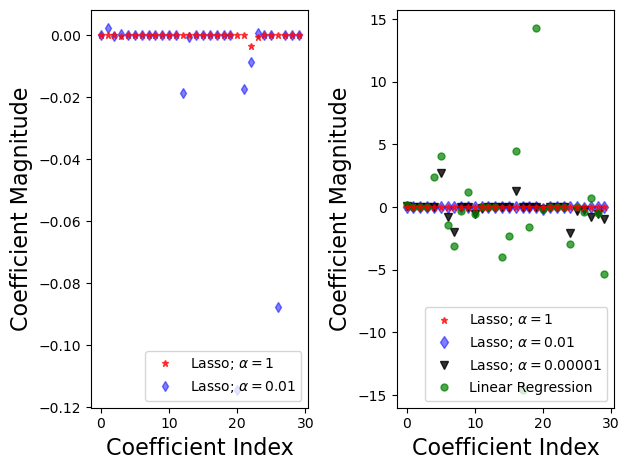

In [8]:
## graph:
plt.subplot(1,2,1)
plt.plot(lasso.coef_   ,alpha=0.7, linestyle='none', marker='*', markersize=5, color='red' , label=r'Lasso; $\alpha = 1$', zorder=7)    # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5, linestyle='none', marker='d', markersize=5, color='blue', label=r'Lasso; $\alpha = 0.01$')           # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=10,loc=4)

plt.subplot(1,2,2)
plt.plot(lasso.coef_      , alpha=0.7, linestyle='none', marker='*', markersize=5, color='red'  , label=r'Lasso; $\alpha = 1$',zorder=7)    # alpha here is for transparency
plt.plot(lasso001.coef_   , alpha=0.5, linestyle='none', marker='d', markersize=6, color='blue' , label=r'Lasso; $\alpha = 0.01$')          # alpha here is for transparency
plt.plot(lasso_00001.coef_, alpha=0.8, linestyle='none', marker='v', markersize=6, color='black', label=r'Lasso; $\alpha = 0.00001$')       # alpha here is for transparency
plt.plot(lr.coef_         , alpha=0.7, linestyle='none', marker='o', markersize=5, color='green', label='Linear Regression'   ,zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=10,loc=4)
plt.tight_layout()
plt.show()